# Outlier Analysis: Significant Strikes vs. Takedowns

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset
file_path = '../Data Cleaning/cleaned data/cleaned_ufc_fight_stat_data.csv'
fighter_stats = pd.read_csv(file_path)

# Focus on the columns for analysis
significant_strikes = fighter_stats['sig_strikes_succ']
takedowns = fighter_stats['takedown_succ']

# Compute Z-Scores for both variables
fighter_stats['z_sig_strikes'] = zscore(significant_strikes)
fighter_stats['z_takedowns'] = zscore(takedowns)

# Define outliers as points where Z-Score > 3 or < -3
fighter_stats['is_outlier'] = (fighter_stats['z_sig_strikes'].abs() > 3) | (fighter_stats['z_takedowns'].abs() > 3)

# Extract outliers
outliers = fighter_stats[fighter_stats['is_outlier']]


## Scatter Plot: Significant Strikes vs. Takedowns

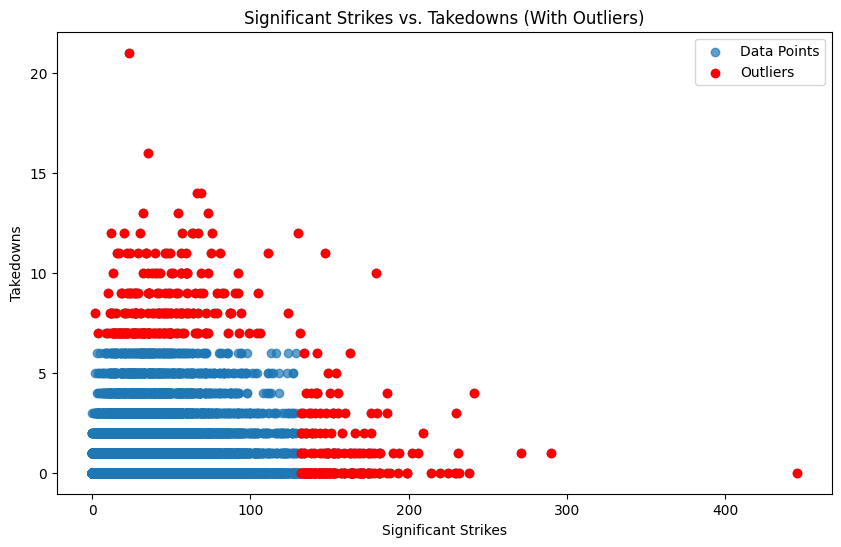

In [2]:

# Plot the data with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(significant_strikes, takedowns, alpha=0.7, label='Data Points')
plt.scatter(outliers['sig_strikes_succ'], outliers['takedown_succ'], color='red', label='Outliers')
plt.title("Significant Strikes vs. Takedowns (With Outliers)")
plt.xlabel("Significant Strikes")
plt.ylabel("Takedowns")
plt.legend()
plt.show()


## Outlier Summary

In [3]:

# Display outlier information
outlier_summary = outliers[['fighter_id', 'sig_strikes_succ', 'takedown_succ', 'z_sig_strikes', 'z_takedowns']]
outlier_summary


,fighter_id,sig_strikes_succ,takedown_succ,z_sig_strikes,z_takedowns
39,512.0,137,0.0,3.174468,-0.630999
54,2650.0,171,0.0,4.245614,-0.630999
55,1132.0,148,0.0,3.521015,-0.630999
112,16.0,163,6.0,3.993579,2.910201
118,263.0,141,0.0,3.300485,-0.630999
...,...,...,...,...,...
13654,2482.0,36,9.0,-0.007465,4.680801
13664,732.0,21,7.0,-0.480030,3.500401
13667,1267.0,49,7.0,0.402091,3.500401
13706,3514.0,9,7.0,-0.858081,3.500401
